In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d msambare/fer2013

 96% 58.0M/60.3M [00:02<00:00, 31.5MB/s]
100% 60.3M/60.3M [00:02<00:00, 24.1MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/fer2013.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset extracted.")

Dataset extracted.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
img_array = cv2.imread("/content/train/fear/Training_10127393.jpg")

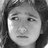

In [7]:
cv2_imshow(img_array)

In [10]:
dir = '/content/train/'
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [11]:
training_data = []
for category in classes:
  path = os.path.join(dir, category)
  class_num = classes.index(category)
  for img in os.listdir(path)[0:1500]:
    img_array = cv2.imread(os.path.join(path,img))
    new_array = cv2.resize(img_array, (28,28))
    training_data.append([new_array, class_num])

In [12]:
len(training_data)

9436

In [13]:
import random
random.shuffle(training_data)

In [14]:
X = []
Y = []

for features, label in training_data:
  X.append(features)
  Y.append(label)

X = (np.array(X).reshape(-1, 28, 28, 3))

In [15]:
X = X/255.0 

In [16]:
Y = np.array(Y)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
cnn_base = tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 1s 0us/step


In [19]:
cnn_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
model = keras.models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation = 'softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(X, Y, epochs = 20)

In [22]:
# We need face detection algorithm, but works only on grey image

In [25]:
frame = cv2.imread('/content/happy-boy-smile.jpg')

In [26]:
frame.shape

(924, 924, 3)

In [32]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [33]:
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

In [34]:
gray.shape

(924, 924)

In [35]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
  facess = faceCascade.detectMultiScale(roi_gray)
  if len(faces) == 0:
    print("Face not detected")
  else:
    for(ex, ey, ew, eh) in facess:
      face_roi = roi_color[ey: ey+eh, ex: ex+ew]

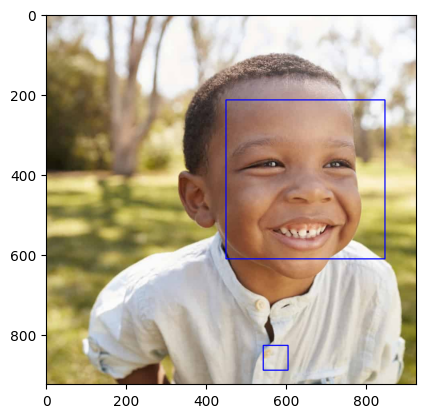

In [36]:
 plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

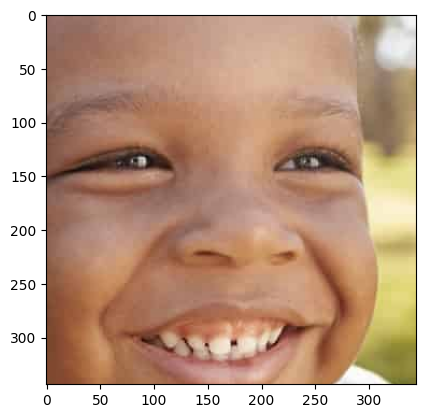

In [37]:
 plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [38]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)  # adding 4th dimension
final_image = final_image/255.0

In [ ]:
pred = model.predict(final_image)

In [ ]:
print(np.argmax(pred))